###### WEEK 2 DATE: 24 MARCH 2022

#### EXER 1:

In [127]:
# Importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 9. Use the “pima-indians-diabetes.csv” dataset and note down the meta information.

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective is to predict based on diagnostic measurements whether a patient has diabetes.






Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

Number of Instances: 768

Number of Attributes: 8 plus class

Pregnancies: Number of times pregnant

Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test

BloodPressure: Diastolic blood pressure (mm Hg)

SkinThickness: Triceps skin fold thickness (mm)

Insulin: 2-Hour serum insulin (mu U/ml)

BMI: Body mass index (weight in kg/(height in m)^2)

DiabetesPedigreeFunction: Diabetes pedigree function

Age: Age (years)

Outcome: Class variable (0 or 1)

In [128]:
# Importing the dataset

df = pd.read_csv("diabetes_csv.csv")
df.head()

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive


In [129]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
preg,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
plas,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
pres,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
skin,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
insu,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
mass,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
pedi,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00


In [130]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
df['class'] = lb_make.fit_transform(df['class'])

<AxesSubplot:>

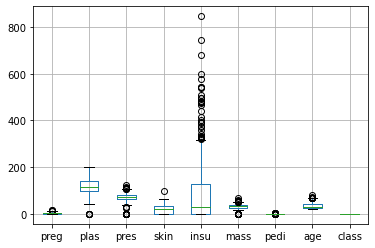

In [131]:
df.boxplot()

In [132]:
for i in ['pres','insu','mass','pedi','age']:
    means = np.mean(df[i], axis=0)
    stds = np.std(df[i], axis=0)
    df[i] = (df[i] - means)/stds


<AxesSubplot:>

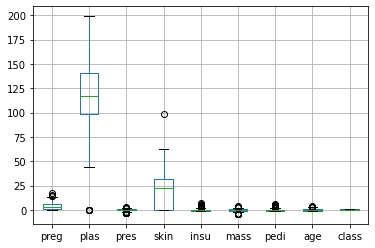

In [133]:
df.boxplot()

### 10. Compute mean & standard deviation , tabulate and visualize the age of the patients.

In [134]:
df['age'].mean()

2.1929795942140137e-16

In [135]:
df['age'].std()

1.0006516781402004

In [136]:
pd.DataFrame(df['age'])

,age
0,1.425995
1,-0.190672
2,-0.105584
3,-1.041549
4,-0.020496
...,...
763,2.532136
764,-0.531023
765,-0.275760
766,1.170732


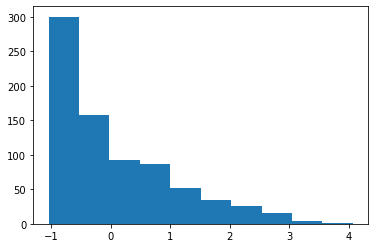

In [137]:
plt.hist(df['age'])
plt.show()

### 11. Analyze and tabulate the relationship of age, BMI of patients with respect to the class.

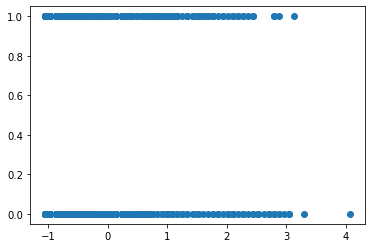

In [138]:
plt.scatter(df['age'],df['class'])

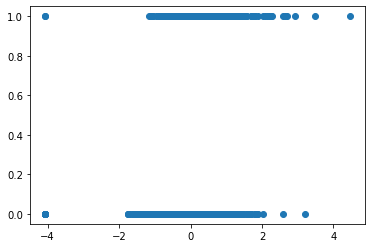

In [139]:
plt.scatter(df['mass'],df['class'])

In [140]:
df[['age','mass','class']]

,age,mass,class
0,1.425995,0.204013,1
1,-0.190672,-0.684422,0
2,-0.105584,-1.103255,1
3,-1.041549,-0.494043,0
4,-0.020496,1.409746,1
...,...,...,...
763,2.532136,0.115169,0
764,-0.531023,0.610154,0
765,-0.275760,-0.735190,0
766,1.170732,-0.240205,1


In [141]:
a=df.pivot_table(index='class',values=['mass','age'])

In [142]:
pd.DataFrame(df['class'].value_counts(normalize = True))

,class
0,0.651042
1,0.348958


### 13. Use the data set to build a logistic regression model (using sklearn) and predict the class label. Divide the dataset into training and test set (70,30) using train_test_split method in sklearn. 

In [143]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

x = df.drop('class',axis=1)
y = df['class']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=101)


In [144]:
logReg = LogisticRegression()
logReg.fit(x_train,y_train)
y_pred = logReg.predict(x_test)
score = logReg.score(x_test,y_test)
score

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7878787878787878

In [145]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)


0.7878787878787878

### 14. Use the test data set and evaluate the performance using a confusion matrix. Visualize the confusion matrix using a heat map.

In [147]:
from sklearn.metrics import confusion_matrix
c = confusion_matrix(y_test,y_pred)
c

array([[133,  17],
       [ 32,  49]], dtype=int64)

<AxesSubplot:>

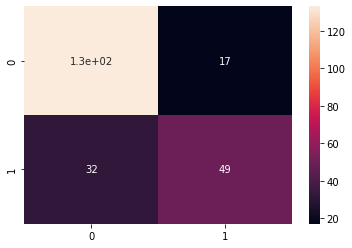

In [148]:
sns.heatmap(c,annot = True)

### 15. Compute accuracy rate, true positive and true negative rate and comment on the performance.

In [149]:
tn, fp, fn, tp = c.ravel()

In [150]:
accuracy_rate = (tp + tn) / (tp+fp+fn+tn)
accuracy_rate

0.7878787878787878

In [151]:
true_pos_rate = tp / (tp+fp)
true_pos_rate

0.7424242424242424

In [152]:
true_neg_rate = tn /(tn+fp)
true_neg_rate

0.8866666666666667

### 16. Visualize the ROC curve, and comment on the performance of the classifier.

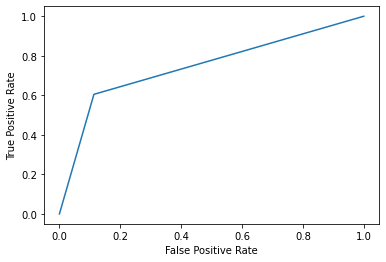

In [153]:
from sklearn.metrics import roc_curve
fpr,tpr,threshold = roc_curve(y_test,y_pred)
plt.plot(fpr,tpr)
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()